<a href="https://colab.research.google.com/github/cartman12/EU-Transporation-CO2-Data/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A peek into Europe's public transportation and CO2 Emission

Data links and labels:  https://github.com/cartman12/EU-Transporation-CO2-Data/tree/master/data
The either collected by EUROSTAT (The euorpeean Statistics Bureau), or generated by third credible parties and assembled by EUROSTAT.

In [0]:
from google.colab import files
uploaded = files.upload()
# t2020_rk310.tsv

Saving t2020_rk310.tsv to t2020_rk310.tsv


In [0]:
uploaded = files.upload()
# demo_gind_1_Data.csv

Saving demo_gind_1_Data.csv to demo_gind_1_Data.csv


In [0]:
uploaded = files.upload()
# env_air_gge_1_Data.csv(

Saving env_air_gge_1_Data.csv to env_air_gge_1_Data.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## DataFrame manipulation and cleaning - EU percentage of passengers per transportaion method between 1990 -2016.

In [0]:
# Loading and cleaning the Data

df = pd.read_csv('t2020_rk310.tsv', sep='\t|\,', na_values = ': ', engine = 'python') # We have two  spererators, tab and comma, and we converted all ":" to NaN values

df = df.rename(columns=lambda x: x.strip()) # Column headers have whitespace at their right side, we stripping that whitespace

df.rename(columns={'geo\\time':'country'}, inplace=True) # "geo\time" header appears to be 'geo\\time' as shown when we run `` list(df.columns) ``

cols = list(df.columns[3:]) # Get select the numerical columns only
df = df.astype('str') # Convert df from object to string

for col in cols: # Iterate through every column strip the letters from the numbers, reconvert the 'nan' to NaN, convert ": z" to 0.
  df[col] = df[col].str.strip(" e b be r d p")
  df[col] = df[col].replace('nan', np.nan)
  df[col] = df[col].replace(': z', 0)
df['country'] = df['country'].replace('EL', 'GR')
df['country'] = df['country'].replace('UK', 'GB')
df[cols] = df[cols].astype('float') # Convert string to float

In [0]:
df.head()

,unit,vehicle,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,PC,BUS_TOT,AT,11.0,10.6,10.5,10.7,10.6,10.9,10.7,10.9,10.9,10.7,11.3,11.2,11.2,11.2,11.3,10.9,10.7,11.1,10.6,10.0,10.6,10.4,10.4,10.3,10.3,10.2,10.2
1,PC,BUS_TOT,BE,10.6,10.7,10.7,10.9,11.8,11.3,11.3,11.1,11.0,10.9,10.8,11.0,11.7,13.0,13.2,13.6,13.9,14.1,13.0,13.0,12.7,12.8,12.9,11.9,11.4,10.9,10.5
2,PC,BUS_TOT,BG,NaN,NaN,NaN,NaN,NaN,29.3,25.3,24.0,24.5,21.9,31.4,32.0,33.4,28.1,25.0,24.3,22.7,21.8,20.8,16.8,16.4,15.9,14.8,14.0,15.1,14.6,14.1
3,PC,BUS_TOT,CH,3.7,3.9,4.0,3.9,3.9,3.6,3.5,3.4,5.1,5.0,5.2,5.2,5.1,5.2,5.2,5.3,5.6,5.5,5.2,5.1,5.1,5.7,5.7,5.7,5.8,5.9,5.9
4,PC,BUS_TOT,CY,NaN,NaN,NaN,NaN,NaN,22.7,22.9,22.6,22.3,22.1,22.3,22.5,22.6,23.6,21.2,20.8,20.4,19.7,18.8,17.6,18.1,18.3,18.7,18.5,18.2,18.7,18.6


In [0]:
countries = pd.read_csv('https://pkgstore.datahub.io/core/country-list/data_csv/data/d7c9d7cfb42cb69f4422dec222dbbaa8/data_csv.csv') # Load a country code dataset
countries.head()

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [0]:
df = df.merge(countries, left_on='country', right_on='Code') # Merge dataframe country with coutnry codes
df = df.drop(columns=['country', 'Code']).rename(columns={'Name':'country'}) # Drop irrelavnt columns

In [0]:
k = list(df.columns[:-1]) # Create list of column names less the 'country' column name
k.insert(0, df.columns[-1]) # Insert the 'country' column name at index 0 of the list
df = df.reindex(columns = k) # Reindex the columns of the DataFrame based on the indexed list
dfT = df.T
dfT = dfT.fillna(method = 'bfill')
df = dfT.T
df[cols] = df[cols].astype('float')


In [0]:
df_copy =df.copy()

In [0]:
df.head()

,country,unit,vehicle,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Austria,PC,BUS_TOT,11.0,10.6,10.5,10.7,10.6,10.9,10.7,10.9,10.9,10.7,11.3,11.2,11.2,11.2,11.3,10.9,10.7,11.1,10.6,10.0,10.6,10.4,10.4,10.3,10.3,10.2,10.2
1,Austria,PC,CAR,77.1,77.0,77.0,77.2,77.8,77.2,77.4,79.0,79.4,79.6,79.0,79.1,79.1,79.3,79.3,79.4,79.3,78.9,78.3,79.0,78.4,78.3,77.9,77.5,77.6,77.8,77.7
2,Austria,PC,TRN,11.9,12.4,12.5,12.1,11.6,12.0,11.9,10.1,9.8,9.6,9.7,9.7,9.7,9.5,9.4,9.8,10.0,10.0,11.1,11.1,11.0,11.3,11.8,12.2,12.1,12.0,12.1
3,Belgium,PC,BUS_TOT,10.6,10.7,10.7,10.9,11.8,11.3,11.3,11.1,11.0,10.9,10.8,11.0,11.7,13.0,13.2,13.6,13.9,14.1,13.0,13.0,12.7,12.8,12.9,11.9,11.4,10.9,10.5
4,Belgium,PC,CAR,83.3,83.3,83.3,83.3,82.6,82.9,82.9,83.0,83.1,83.1,83.0,82.6,81.9,80.5,79.6,79.8,79.2,78.8,79.6,79.5,79.7,79.5,79.3,79.8,80.4,81.2,81.8


## Looking at the data, choosing a country as case study

In [0]:
# Create a column that depicts the percentgae of change in each method and country from 1990 to 2016.
df['Percentage_of_change'] = ((df['2016'] - df['1990'])/df['1990']).astype('float')

In [0]:
df.nlargest(1, ['Percentage_of_change'])  # Filter by the largest 9 percentge of change

,country,unit,vehicle,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Percentage_of_change
94,Turkey,PC,CAR,27.5,27.6,28.1,30.8,34.8,36.5,37.2,38.2,40.0,42.7,45.9,49.6,49.0,49.2,51.3,52.3,53.9,54.9,56.3,56.9,59.3,59.2,61.6,63.7,64.9,67.6,70.1,1.549091


Based on the above table, Turkey seems like an interesting case study, showing a drastic shift from public transportation into private transportation.

In [0]:
df.isnull().sum()

country                 0
unit                    0
vehicle                 0
1990                    0
1991                    0
1992                    0
1993                    0
1994                    0
1995                    0
1996                    0
1997                    0
1998                    0
1999                    0
2000                    0
2001                    0
2002                    0
2003                    0
2004                    0
2005                    0
2006                    0
2007                    0
2008                    0
2009                    0
2010                    0
2011                    0
2012                    0
2013                    0
2014                    0
2015                    0
2016                    0
Percentage_of_change    3
dtype: int64

In [0]:
df.shape

(99, 31)

In [0]:
df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Percentage_of_change
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,96.000000
mean,33.334343,33.334343,33.336364,33.339394,33.335354,33.334343,33.337374,33.332323,33.333333,33.331313,33.335354,33.331313,33.336364,33.334343,33.333333,33.335354,33.331313,33.333333,33.333333,33.329293,33.337374,33.330303,33.332323,33.332323,33.336364,33.331313,33.334343,-0.067317
std,31.220301,31.429997,31.680795,31.758999,31.917123,32.093897,32.942927,32.545735,32.795638,33.111058,33.071180,33.183016,33.484890,33.665119,33.857194,34.073786,34.222083,34.247982,34.156094,34.776421,34.633641,34.456164,34.652643,34.700582,34.735747,34.761921,34.903105,0.405121
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.841509
25%,7.200000,7.150000,7.100000,7.700000,7.350000,7.300000,6.550000,7.350000,7.250000,7.000000,6.950000,6.750000,6.600000,6.400000,6.350000,6.300000,6.250000,6.500000,6.400000,6.200000,6.350000,6.100000,6.100000,6.450000,6.250000,6.500000,6.650000,-0.288704
50%,17.300000,17.300000,17.300000,17.300000,16.800000,15.500000,14.600000,15.000000,14.600000,13.800000,13.600000,13.700000,13.300000,13.400000,13.200000,12.900000,12.400000,14.000000,13.000000,13.000000,12.700000,13.200000,13.700000,13.200000,12.200000,12.300000,12.300000,-0.022028
75%,67.350000,67.350000,67.750000,68.100000,69.000000,69.000000,72.250000,72.250000,72.950000,73.750000,72.950000,73.400000,75.450000,76.050000,76.750000,76.600000,77.150000,77.450000,76.900000,78.300000,78.100000,77.350000,77.600000,78.450000,78.750000,79.200000,80.000000,0.093821
max,88.600000,88.600000,88.600000,88.900000,89.200000,89.200000,94.700000,88.700000,88.600000,88.800000,88.600000,88.600000,89.100000,88.900000,88.800000,89.800000,90.900000,91.000000,91.200000,92.300000,91.700000,90.800000,91.900000,91.400000,89.800000,89.600000,89.900000,1.549091


## Ploting bar and line - Comparing the use of cars vs the use of public transportation

In [0]:
def selectcountry(df,country): # Create a function that create a bar and line pllot refelecting of the selected country
  
  name = df.loc[df['country'] == country] # Select the country
  name = name.T # Transpose the data
  name.columns = name.iloc[2] # Reindex the columns' header
  name = name.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
  name['public_transport'] = name['TRN'] + name['BUS_TOT'] # Create a column consisting of both train and bus
  
  plt.style.use('fivethirtyeight') # choose the 538 style
  ax = name[['CAR','TRN', 'BUS_TOT']].plot(kind='bar',figsize = (15,7)) # Plot

  ax2 = name['public_transport'].plot( color = 'purple', rot = 90)
  ax2.legend(labels = ['Public Transportation (Bus + Train)', 'Cars','Train','Bus'],bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.) # Labale the legends, and set them outside the graph
  plt.xlim([-0.35, len(name['public_transport'])-0.35]) # Set xlim so that we can add the line
  
  # Set x and y ticks
  plt.yticks([0, 10, 20, 30, 40, 50, 60, 70])
  ax.set_yticklabels(labels = ['0','10 ', '20', '30', '40','50','60','70%'], alpha =0.7)
  ax.set_xticklabels(labels = cols, alpha = 0.7)
  
  # Titlem labels and text
  plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
  ax.text(x = -2, y = 80, s = 'Private vs Public Transportation in '+ country + '\nPercentage of Passengers (by Km) per Year (1990-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
  plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - FIG 1 - Mohamad Ali Nasser                                                                                                                                                      Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
  
  return plt.show()   

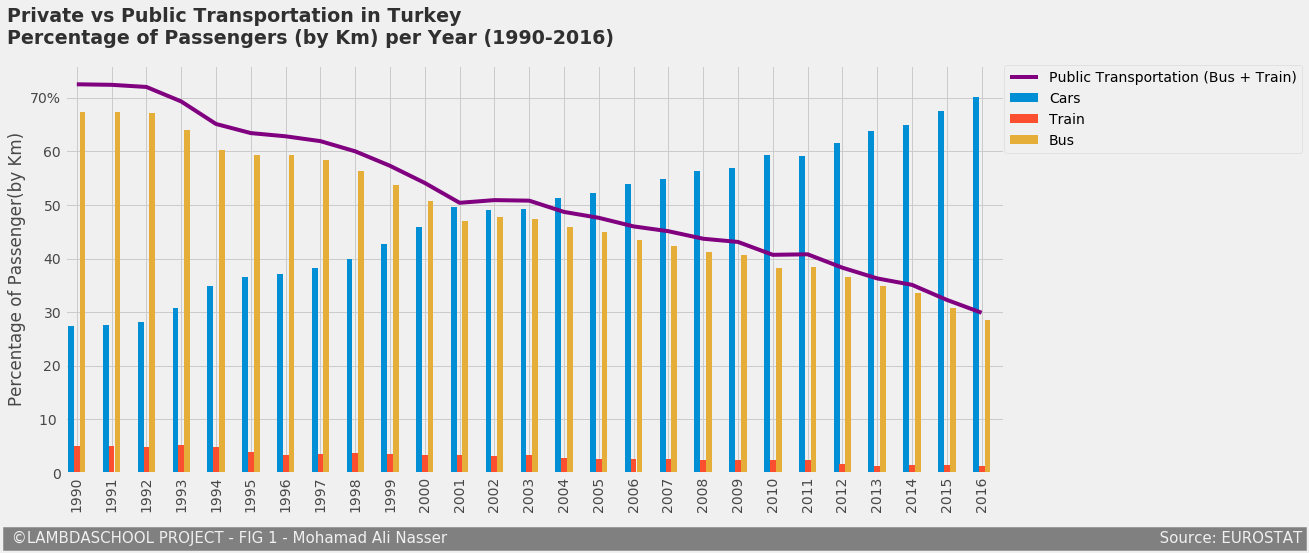

In [0]:
selectcountry(df, 'Turkey')

## Plotting The mean of EU transportation vs Turkey

In [0]:
df.head()

,country,unit,vehicle,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Percentage_of_change
0,Austria,PC,BUS_TOT,11.0,10.6,10.5,10.7,10.6,10.9,10.7,10.9,10.9,10.7,11.3,11.2,11.2,11.2,11.3,10.9,10.7,11.1,10.6,10.0,10.6,10.4,10.4,10.3,10.3,10.2,10.2,-0.072727
1,Austria,PC,CAR,77.1,77.0,77.0,77.2,77.8,77.2,77.4,79.0,79.4,79.6,79.0,79.1,79.1,79.3,79.3,79.4,79.3,78.9,78.3,79.0,78.4,78.3,77.9,77.5,77.6,77.8,77.7,0.007782
2,Austria,PC,TRN,11.9,12.4,12.5,12.1,11.6,12.0,11.9,10.1,9.8,9.6,9.7,9.7,9.7,9.5,9.4,9.8,10.0,10.0,11.1,11.1,11.0,11.3,11.8,12.2,12.1,12.0,12.1,0.016807
3,Belgium,PC,BUS_TOT,10.6,10.7,10.7,10.9,11.8,11.3,11.3,11.1,11.0,10.9,10.8,11.0,11.7,13.0,13.2,13.6,13.9,14.1,13.0,13.0,12.7,12.8,12.9,11.9,11.4,10.9,10.5,-0.009434
4,Belgium,PC,CAR,83.3,83.3,83.3,83.3,82.6,82.9,82.9,83.0,83.1,83.1,83.0,82.6,81.9,80.5,79.6,79.8,79.2,78.8,79.6,79.5,79.7,79.5,79.3,79.8,80.4,81.2,81.8,-0.018007


In [0]:
# Seperate the data into three dtaframes, Car, Bus nad Train

cars = df[cols].loc[df['vehicle'] == 'CAR'].T  # Transpose because the data its easier to maniopulate the data this way in this particular dataset.
cars['mean'] = cars.loc[: , :].mean(axis=1) # Mean of of all collumns in a new column

bus = df[cols].loc[df['vehicle'] == 'BUS_TOT'].T
bus['mean_bus'] = bus.loc[: , :].mean(axis=1)

train = df[cols].loc[df['vehicle'] == 'TRN'].T
train['mean_train'] = train.loc[: , :].mean(axis=1)

public_transport = pd.concat([bus['mean_bus'], train['mean_train']], axis=1, sort=False) # Concat both train and bus to make up the public transportation sector. Note, both have the same shape.

public_transport['eu_mean'] = bus['mean_bus'] + train['mean_train'] ### EU MEAN

In [0]:
cars.head()

,1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,97,mean
1990,77.1,83.3,59.6,82.1,77.3,68.9,85.4,82.4,73.2,64.0,78.1,81.2,84.8,70.7,60.5,84.9,88.6,80.2,82.2,85.3,67.3,81.6,80.6,87.6,88.1,41.3,68.2,56.2,84.1,62.7,46.5,27.5,88.0,73.621212
1991,77.0,83.3,59.6,81.1,77.3,68.9,84.6,82.9,73.2,64.6,80.4,81.7,85.1,70.7,63.2,84.3,88.6,80.6,82.2,85.4,67.3,81.6,80.6,87.6,88.1,49.8,68.2,56.2,84.7,66.4,46.5,27.6,88.2,74.166667
1992,77.0,83.3,59.6,81.4,77.3,68.9,85.0,82.8,73.2,64.3,80.8,82.0,85.6,70.7,63.9,84.2,88.6,82.3,82.2,84.9,67.3,81.6,80.6,87.6,88.1,55.3,68.2,56.2,84.8,73.9,46.5,28.1,88.5,74.687879
1993,77.2,83.3,59.6,80.9,77.3,68.9,84.5,80.5,73.2,65.4,81.4,81.9,86.2,70.7,64.5,83.8,88.6,82.9,82.2,85.2,67.3,81.6,80.6,87.6,88.1,57.9,72.2,56.2,84.4,75.8,46.5,30.8,88.9,75.033333
1994,77.8,82.6,59.6,80.6,77.3,71.3,85.8,80.2,73.2,66.7,81.9,81.8,86.5,70.7,64.3,83.0,88.6,83.0,82.2,84.9,67.3,81.6,80.6,87.6,88.1,62.3,74.3,56.2,84.4,76.6,47.7,34.8,89.2,75.536364


In [0]:
### Selecting Turkey

turkey = df.loc[df['country'] == 'Turkey'] # Select the country
turkey = turkey.T # Transpose the data
turkey.columns = turkey.iloc[2] # Reindex the columns' header
turkey = turkey.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
turkey['public_transport'] = turkey['TRN'] + turkey['BUS_TOT'] # Create a column consisting of both train and bus

In [0]:
turkey.head()

vehicle,BUS_TOT,CAR,TRN,public_transport
1990,67.4,27.5,5.1,72.5
1991,67.4,27.6,5,72.4
1992,67.2,28.1,4.8,72
1993,64,30.8,5.3,69.3
1994,60.3,34.8,4.8,65.1


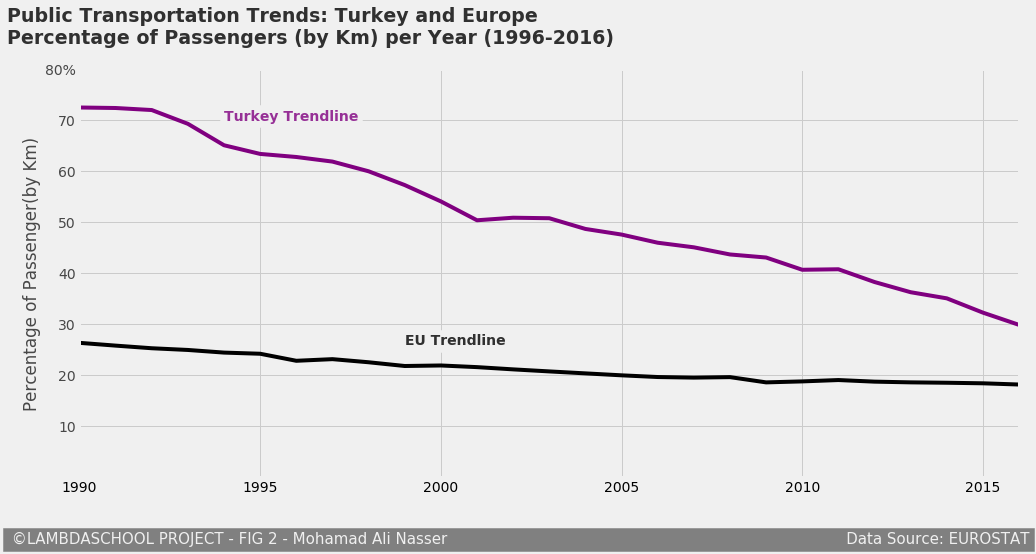

In [0]:
plt.style.use('fivethirtyeight') # choose the 538 style

ax = public_transport['eu_mean'].plot(figsize = (15,7), color = 'black') ### EU
ax1 = turkey['public_transport'].plot(figsize = (15,7), color = 'purple') ### Turkey

# Set y ticks
plt.yticks([ 0, 10, 20, 30, 40, 50, 60, 70, 80])
ax.set_yticklabels(labels = ['','10', '20', '30', '40','50','60','70','80%'], alpha =0.7)

# Add labels to lines
ax.text(x = 4, y = 70, s = 'Turkey Trendline', color = 'purple', weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)
ax1.text(x = 9, y = 26, s = 'EU Trendline', color = 'black', weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)

# Title, xy labels and text
plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
ax.text(x = -2, y = 85, s = 'Public Transportation Trends: Turkey and Europe \nPercentage of Passengers (by Km) per Year (1996-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - FIG 2 - Mohamad Ali Nasser                                                                                    Data Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
plt.show()

In [0]:
df.loc[df['vehicle'] == 'CAR'].nsmallest(1, ['Percentage_of_change'])  # Chooing the countyr that underwent the largest negative change in cars.

,country,unit,vehicle,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Percentage_of_change
10,Switzerland,PC,CAR,82.1,81.1,81.4,80.9,80.6,83.1,83.2,83.2,81.8,81.7,81.1,80.6,80.1,79.8,79.6,78.4,77.9,77.4,77.8,77.5,77.3,74.8,75.0,75.0,74.6,74.4,74.3,-0.095006


So will will add Switzerland to the graph and compare

In [0]:
swiss = df.loc[df['country'] == 'Switzerland'] # Select the country
swiss = swiss.T # Transpose the data
swiss.columns = swiss.iloc[2] # Reindex the columns' header
swiss = swiss.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
swiss['public_transport'] = swiss['TRN'] + swiss['BUS_TOT'] # Create a column consisting of both train and bus

## Plot 2 --

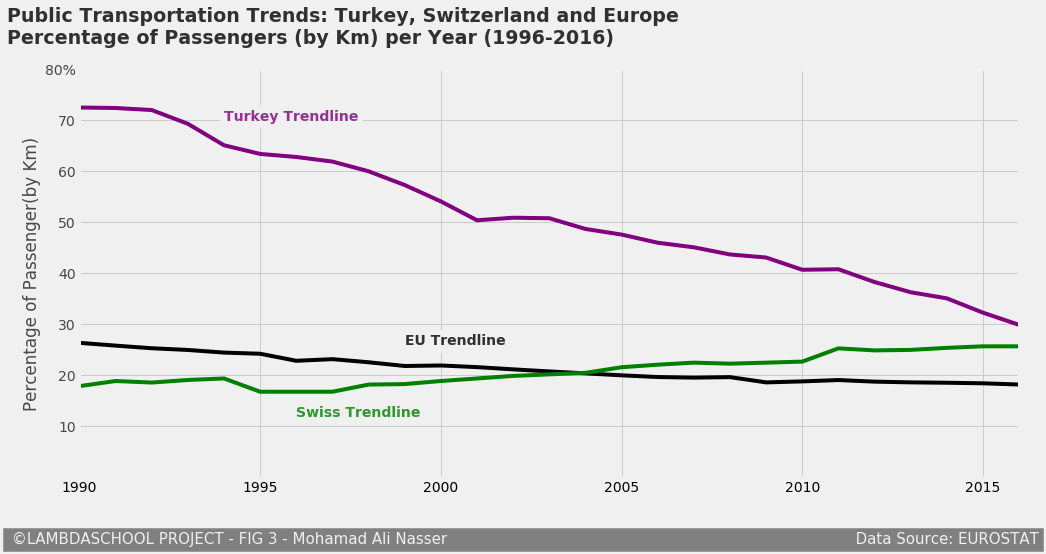

In [0]:
plt.style.use('fivethirtyeight') # choose the 538 style

ax = public_transport['eu_mean'].plot(figsize = (15,7), color = 'black')
ax1 = turkey['public_transport'].plot(figsize = (15,7), color = 'purple')
ax2 = swiss['public_transport'].plot(figsize = (15,7), color = 'green') #### Add Switzerland

# Set x and y ticks
plt.yticks([ 0, 10, 20, 30, 40, 50, 60, 70, 80])
ax.set_yticklabels(labels = ['','10', '20', '30', '40','50','60','70','80%'], alpha =0.7)
 # Set xlim so that we can add the line
# plt.xticks([int(num) for num in cols])

ax.text(x = 4, y = 70, s = 'Turkey Trendline', color = 'purple', weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)
ax1.text(x = 9, y = 26, s = 'EU Trendline', color = 'black', weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)
ax2.text(x = 6, y = 12, s = 'Swiss Trendline', color = 'green', weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)

# Titlem labels and text
plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
ax.text(x = -2, y = 85, s = 'Public Transportation Trends: Turkey, Switzerland and Europe \nPercentage of Passengers (by Km) per Year (1996-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - FIG 3 - Mohamad Ali Nasser                                                                                      Data Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
plt.show()

## Adding both plots together

In [0]:
def selectcountry_EU(df,country): # Create a function that create a bar and line pllot refelecting of the selected country
  
  name = df.loc[df['country'] == country] # Select the country
  name = name.T # Transpose the data
  name.columns = name.iloc[2] # Reindex the columns' header
  name = name.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
  name['public_transport'] = name['TRN'] + name['BUS_TOT'] # Create a column consisting of both train and bus
  
  plt.style.use('fivethirtyeight') # choose the 538 style
  ax = name[['CAR','TRN', 'BUS_TOT']].plot(kind='bar',figsize = (15,7)) # Plot

  ax2 = name['public_transport'].plot( color = 'purple')
  ax3 = public_transport['eu_mean'].plot(color = 'black', rot = 90, alpha = 0.8)
  ax3.legend(labels = ['Public Transportation (Bus + Train)', 'EU Mean Public Transportation','Train','Bus'],bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.) # Labale the legends, and set them outside the graph
  plt.xlim([-0.35, len(name['public_transport'])-0.35]) # Set xlim so that we can add the line
  
  # Set x and y ticks
  plt.yticks([0, 10, 20, 30, 40, 50, 60, 70])
  ax.set_yticklabels(labels = ['0','10 ', '20', '30', '40','50','60','70%'], alpha =0.7)
  ax.set_xticklabels(labels = cols, alpha = 0.7)
  
  # Titlem labels and text
  plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
  ax.text(x = -2, y = 80, s = 'Private vs Public Transportation in '+ country + ' Compared with EU Public Transportaion Trend \nPercentage of Passengers (by Km) per Year (1990-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
  plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - Mohamad Ali Nasser                                                                                                                                                                 Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
  return plt.show()

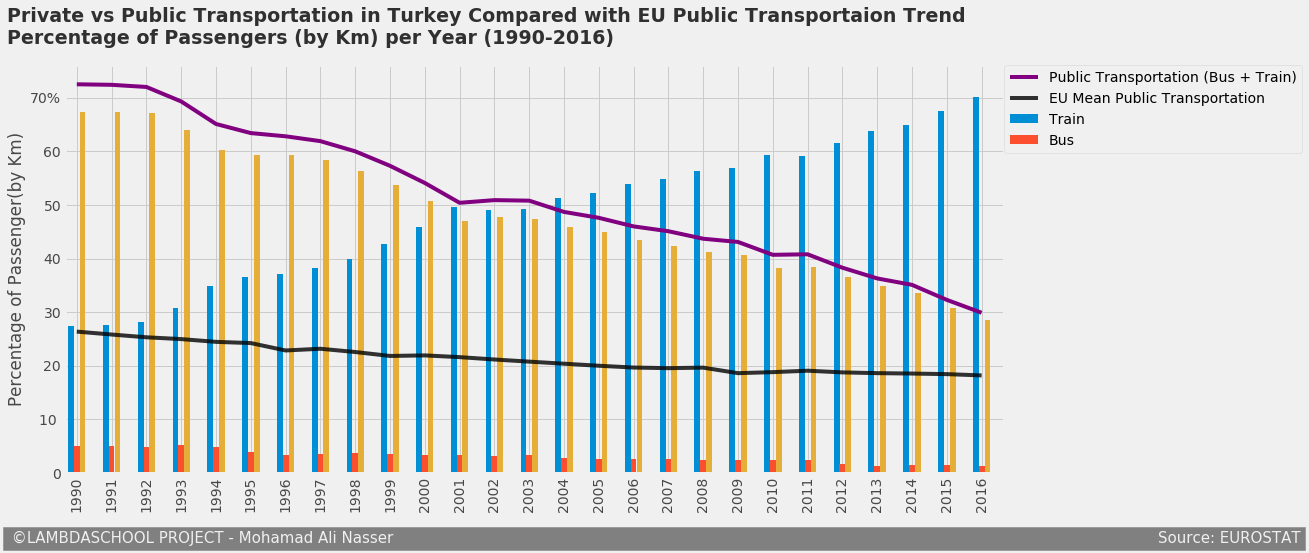

In [0]:
selectcountry_EU(df, 'Turkey')

## Loading Carbon Dioxide Data

In [0]:
df2 = pd.read_csv('env_air_gge_1_Data.csv')
df2 = df2.drop('Flag and Footnotes', axis =1)
df2['GEO'] = df2['GEO'].replace(['European Union - 28 countries and Iceland under the Kyoto Protocol', 'European Union - 28 countries'],np.nan, regex = True) ### Drop irrelavant data

df2 = df2.dropna()

In [0]:
df2.dtypes

TIME          int64
GEO          object
UNIT         object
AIRPOL       object
AIREMSECT    object
Value        object
dtype: object

In [0]:
df2.tail()

,TIME,GEO,UNIT,AIRPOL,AIREMSECT,Value
120955,2016,Turkey,Thousand tonnes,Nitrogen trifluoride (CO2 equivalent),Industrial processes and product use,:
120956,2016,Turkey,Thousand tonnes,Nitrogen trifluoride (CO2 equivalent),Agriculture,:
120957,2016,Turkey,Thousand tonnes,Nitrogen trifluoride (CO2 equivalent),"Land use, land use change, and forestry (LULUCF)",:
120958,2016,Turkey,Thousand tonnes,Nitrogen trifluoride (CO2 equivalent),Waste management,:
120959,2016,Turkey,Thousand tonnes,Nitrogen trifluoride (CO2 equivalent),Other sectors,0


In [0]:
### Selecting the data
df2 = df2.loc[(df2['TIME'] >= 1990) & ### by Date
              (df2['AIREMSECT'] == 'All sectors (excluding LULUCF and memo items)') &
              (df2['AIRPOL'] == 'Carbon dioxide') | ### selecting CO2
              (df2['AIRPOL'] == 'Greenhouse gases (CO2, N2O in CO2 equivalent, CH4 in CO2 equivalent, HFC in CO2 equivalent, PFC in CO2 equivalent, SF6 in CO2 equivalent, NF3 in CO2 equivalent')] ### selecting other greenhouse gases related to cars

In [0]:
df2['GEO'].unique()

array(['Belgium', 'Bulgaria', 'Czechia', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom',
       'Iceland', 'Liechtenstein', 'Norway', 'Switzerland', 'Turkey'],
      dtype=object)

In [0]:
df2.isnull().sum()

TIME         0
GEO          0
UNIT         0
AIRPOL       0
AIREMSECT    0
Value        0
dtype: int64

In [0]:
df2.tail()

,TIME,GEO,UNIT,AIRPOL,AIREMSECT,Value
120436,2016,Iceland,Thousand tonnes,Carbon dioxide,All sectors (excluding LULUCF and memo items),"3,489.97"
120544,2016,Liechtenstein,Thousand tonnes,Carbon dioxide,All sectors (excluding LULUCF and memo items),148.36
120652,2016,Norway,Thousand tonnes,Carbon dioxide,All sectors (excluding LULUCF and memo items),"44,031.62"
120760,2016,Switzerland,Thousand tonnes,Carbon dioxide,All sectors (excluding LULUCF and memo items),"39,204.91"
120868,2016,Turkey,Thousand tonnes,Carbon dioxide,All sectors (excluding LULUCF and memo items),"402,820.78"


In [0]:
df2 = df2.drop(columns = ['UNIT', 'AIRPOL', 'AIREMSECT'])

In [0]:
df2['Value'] = df2['Value'].str.replace(',', '').astype(float) ### make floats
df2 = df2.set_index('TIME')

In [0]:
df2_copy = df2.copy()

In [0]:
df2.tail(30)

,GEO,Value
TIME,,
2016,Denmark,37117.34
2016,Germany (until 1990 former territory of the FRG),801753.01
2016,Estonia,17493.50
2016,Ireland,39928.12
2016,Greece,71373.08
2016,Spain,260985.90
2016,France,340433.16
2016,Croatia,18220.60
2016,Italy,350323.01


In [0]:
df2_turkey_pol = df2.loc[(df2['GEO'] == 'Turkey')] # select Turkey
df2_swiss_pol = df2.loc[df2['GEO'] == 'Switzerland']


In [0]:
df2_turkey_pol.head()

,GEO,Value
TIME,,
1990,Turkey,146507.20
1991,Turkey,153538.02
1992,Turkey,159065.85
1993,Turkey,167301.87
1994,Turkey,163783.17


### Load Population Data and calculate the CO2 emission per capita

In [0]:
df3 = pd.read_csv('demo_gind_1_Data.csv')
df3['INDIC_DE'] = df3['INDIC_DE'].str.strip(" ")
df3.columns = df3.columns.str.strip(" ")
df3 = df3.loc[(df3['TIME'] < 2017) &
              (df3['INDIC_DE'] == 'Population on 1 January - total')]
df3['Value'] = df3['Value'].replace(':', np.nan)
df3['GEO'] = df3['GEO'].replace(['European Union - 27 countries (from 2019)','European Union - 28 countries','European Union - 27 countries (2007-2013)','Euro area (19 countries)','Euro area (18 countries)'], np.nan)
df3['GEO']
df3 = df3.dropna()

In [0]:
df3.tail()

,TIME,GEO,INDIC_DE,Value
7940,2016,San Marino,Population on 1 January - total,"33,005"
7945,2016,Ukraine,Population on 1 January - total,"42,590,879"
7950,2016,Armenia,Population on 1 January - total,"2,998,577"
7955,2016,Azerbaijan,Population on 1 January - total,"9,705,643"
7960,2016,Georgia,Population on 1 January - total,"3,720,400"


In [0]:
df3 = df3.set_index('TIME')
df3['Value'] = df3['Value'].str.replace(',', '').astype(int)

In [0]:
df3_copy = df3.copy()

In [0]:
df3_turkey_pop = df3.loc[df3['GEO'] == 'Turkey']
df3_swiss_pop = df3.loc[df3['GEO'] == 'Switzerland']

In [0]:
df3_turkey_pop.tail()

,GEO,INDIC_DE,Value
TIME,,,
2012,Turkey,Population on 1 January - total,74724269
2013,Turkey,Population on 1 January - total,75627384
2014,Turkey,Population on 1 January - total,76667864
2015,Turkey,Population on 1 January - total,77695904
2016,Turkey,Population on 1 January - total,78741053


In [0]:
### Merge with the second datafarame and map it to the countries

df_turkey_merged = pd.merge(df2_turkey_pol, df3_turkey_pop['Value'],left_index=True, right_index=True, how='left').rename(columns={'Value_x':'Polution_tonne', 'Value_y':'population'})
df_swiss_merged = pd.merge(df2_swiss_pol, df3_swiss_pop['Value'],left_index=True, right_index=True, how='left').rename(columns={'Value_x':'Polution_tonne', 'Value_y':'population'})

In [0]:
### add column per capita
df_turkey_merged['tonne_per_capita'] = df_turkey_merged['Polution_tonne'] / df_turkey_merged['population'] * 1000
df_swiss_merged['tonne_per_capita'] = df_swiss_merged['Polution_tonne'] / df_swiss_merged['population'] * 1000

In [0]:
df_turkey_merged.tail()

,GEO,Polution_tonne,population,tonne_per_capita
TIME,,,,
2012,Turkey,354134.76,74724269,4.739220
2013,Turkey,346780.97,75627384,4.585389
2014,Turkey,357559.96,76667864,4.663753
2015,Turkey,380858.10,77695904,4.901907
2016,Turkey,402820.78,78741053,5.115766


In [0]:
df4_eu_tc = df2_copy.merge(df3_copy[['GEO','Value']], on=['TIME','GEO'], how='left').rename(columns={'Value_x':'Polution_tonne', 'Value_y':'population'})

In [0]:
df4_eu_tc.head()

,GEO,Polution_tonne,population
TIME,,,
1990,Belgium,120484.40,9947782
1990,Bulgaria,78672.94,8767308
1990,Czechia,164227.40,10362102
1990,Denmark,53600.87,5135409
1990,Germany (until 1990 former territory of the FRG),1052997.50,62679035


In [0]:
df4_eu_tc = df4_eu_tc.groupby('TIME').mean() ### MEAN

In [0]:
df4_eu_tc.head()

,Polution_tonne,population
TIME,,
1990,142451.086364,1.596637e+07
1991,140959.696667,1.655518e+07
1992,136767.074848,1.662606e+07
1993,134444.542424,1.671323e+07
1994,133749.086364,1.679091e+07


In [0]:
df4_eu_tc['eu_tonne_per_capita'] = df4_eu_tc['Polution_tonne'] / df4_eu_tc['population'] * 1000

In [0]:
df4_eu_tc.tail()

,Polution_tonne,population,eu_tonne_per_capita
TIME,,,
2012,126628.588788,1.794147e+07,7.057870
2013,123762.149091,1.800726e+07,6.872904
2014,118826.175152,1.810647e+07,6.562638
2015,120561.868485,1.818142e+07,6.631049
2016,120568.243333,1.826760e+07,6.600113


## Plot 3 --

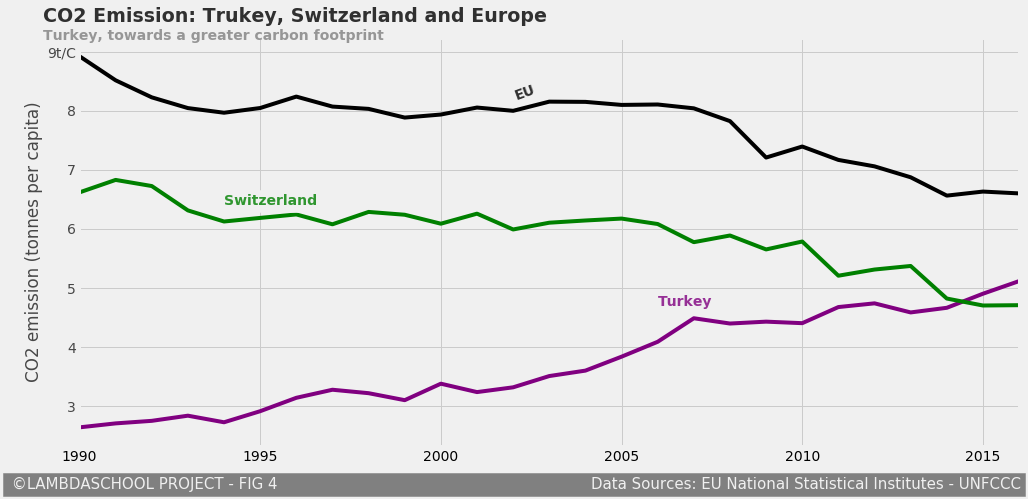

In [0]:
plt.style.use('fivethirtyeight') # choose the 538 style


ax = df_turkey_merged['tonne_per_capita'].plot( figsize = (15,7), color = 'purple')
ax1 = df_swiss_merged['tonne_per_capita'].plot( figsize = (15,7), color = 'green')
ax2 = df4_eu_tc['eu_tonne_per_capita'].plot( figsize = (15,7), color = 'black')

# Set x and y ticks
plt.yticks([ 3, 4, 5, 6, 7,8,9])
ax.set_yticklabels(labels = ['3','4', '5', '6', '7','8','9t/C'], alpha =0.7)


ax.text(x = 2006, y = 4.7, s = 'Turkey', color = 'purple', weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)
ax1.text(x = 2002, y = 8.3, s = 'EU', color = 'black', weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8, rotation = 20)
ax2.text(x = 1994, y = 6.4, s = 'Switzerland', color = 'green', weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)

# Title, labels and text
plt.xlabel('')
plt.ylabel('CO2 emission (tonnes per capita)', alpha = 0.7)
ax.text(x = 1989, y = 9.5, s = 'CO2 Emission: Trukey, Switzerland and Europe', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
ax.text(x = 1989, y = 9.2, s = 'Turkey, towards a greater carbon footprint', fontsize = 14, color= 'grey', alpha = 0.8,fontweight ='bold' )
plt.text(x = 1988, y = 1.6, s = " ©LAMBDASCHOOL PROJECT - FIG 4                                                                  Data Sources: EU National Statistical Institutes - UNFCCC", fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
plt.show()

##  Loading Population data

In [0]:
# ! pip install mplcursors
# ! pip install git+https://github.com/anntzer/mplcursors

In [0]:
### Select drop etc.

cars = df.loc[df['vehicle'] == 'CAR']
cars_copy = cars.copy()
df_copy = df.copy().drop(['Percentage_of_change','unit'], axis =1)
df_copy2 = df_copy.copy()
cars_copyT = cars_copy.T
new_header = cars_copyT.iloc[0]
cars_copyT = cars_copyT[1:]
cars_copyT.columns = new_header

In [0]:
cars_copy.head()

,country,unit,vehicle,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Percentage_of_change
1,Austria,PC,CAR,77.1,77.0,77.0,77.2,77.8,77.2,77.4,79.0,79.4,79.6,79.0,79.1,79.1,79.3,79.3,79.4,79.3,78.9,78.3,79.0,78.4,78.3,77.9,77.5,77.6,77.8,77.7,0.007782
4,Belgium,PC,CAR,83.3,83.3,83.3,83.3,82.6,82.9,82.9,83.0,83.1,83.1,83.0,82.6,81.9,80.5,79.6,79.8,79.2,78.8,79.6,79.5,79.7,79.5,79.3,79.8,80.4,81.2,81.8,-0.018007
7,Bulgaria,PC,CAR,59.6,59.6,59.6,59.6,59.6,59.6,61.9,61.0,63.3,67.9,60.8,61.5,61.2,66.5,69.8,70.9,72.6,73.8,75.1,79.5,80.0,80.6,82.1,83.0,82.3,83.1,83.7,0.404362
10,Switzerland,PC,CAR,82.1,81.1,81.4,80.9,80.6,83.1,83.2,83.2,81.8,81.7,81.1,80.6,80.1,79.8,79.6,78.4,77.9,77.4,77.8,77.5,77.3,74.8,75.0,75.0,74.6,74.4,74.3,-0.095006
13,Cyprus,PC,CAR,77.3,77.3,77.3,77.3,77.3,77.3,77.1,77.4,77.7,77.9,77.7,77.5,77.4,76.4,78.8,79.2,79.6,80.3,81.2,82.4,81.9,81.7,81.3,81.5,81.8,81.3,81.4,0.053040


In [0]:
# Transform the Dataframe - make the columns (years) as rows while leaving the countries as row.
def transform(df):
  num = 0
  appended_data = []
  for i in cols:
    transformed = df.iloc[:,(num+3):(num+4)].rename(columns={i: 'PC'})
    transformed['TIME'] = 1990+num
    transformed['country'] = df.iloc[:,0:1]
    transformed = transformed.rename(columns={'country':'GEO'})
    appended_data.append(transformed.dropna(axis=1))
    
    num = num+1
  transformed = pd.concat(appended_data)
  return transformed

In [0]:
car_copy_transformed = transform(cars_copy)

In [0]:
car_copy_transformed.head() ### THIS FORM ENABLES US TO MERGE

,PC,TIME,GEO
1,77.1,1990,Austria
4,83.3,1990,Belgium
7,59.6,1990,Bulgaria
10,82.1,1990,Switzerland
13,77.3,1990,Cyprus


In [0]:
df2_copy.head()

,GEO,Value
TIME,,
1990,Belgium,120484.40
1990,Bulgaria,78672.94
1990,Czechia,164227.40
1990,Denmark,53600.87
1990,Germany (until 1990 former territory of the FRG),1052997.50


In [0]:
# strip whitespace

df2_copy['GEO'] = df2_copy['GEO'].str.strip()
df3_copy['GEO'] = df3_copy['GEO'].str.strip()

In [0]:
# Create a new column from index with the name TIME

df2_copy['TIME'] = df2_copy.index
df3_copy['TIME'] = df3_copy.index


In [0]:
# Rename index index

df2_copy.index.names = ['index']
df3_copy.index.names = ['index']

In [0]:
# Merge both population data and co2 emission

df4_eu_tc = df2_copy.merge(df3_copy[['TIME','GEO','Value']], on=['TIME','GEO'], how ='inner').rename(columns={'Value_x':'Polution_tonne', 'Value_y':'population'})


In [0]:
df4_eu_tc.head()

,GEO,Polution_tonne,TIME,population
0,Belgium,120484.40,1990,9947782
1,Bulgaria,78672.94,1990,8767308
2,Czechia,164227.40,1990,10362102
3,Denmark,53600.87,1990,5135409
4,Germany (until 1990 former territory of the FRG),1052997.50,1990,62679035


In [0]:
# create co2 per capita column

df4_eu_tc['eu_tonne_per_capita'] = df4_eu_tc['Polution_tonne'] / df4_eu_tc['population'] * 1000

In [0]:
# merge with the percentage of passengers per car (after transformation of DF)

df4_eu_tc = df4_eu_tc.merge(car_copy_transformed[['TIME','GEO','PC']], on=['TIME','GEO'], how ='inner').rename(columns={'Value_x':'Polution_tonne', 'Value_y':'population'})


In [0]:
# df4_eu_tc_car = df4_eu_tc.merge(df_copy_transformed[['TIME','country','PC','vehicle']], left_on=['TIME','GEO'],right_on=['TIME','country'], how ='inner').rename(columns={'Value_x':'Polution_tonne', 'Value_y':'population'})


In [0]:
df4_eu_tc.head()

,GEO,Polution_tonne,TIME,population,eu_tonne_per_capita,PC
0,Belgium,120484.40,1990,9947782,12.111685,83.3
1,Bulgaria,78672.94,1990,8767308,8.973443,59.6
2,Denmark,53600.87,1990,5135409,10.437508,82.4
3,Estonia,37068.98,1990,1570599,23.601811,73.2
4,Ireland,32877.94,1990,3506970,9.375027,84.9


In [0]:
help(stats.pearsonr)

In [0]:
from scipy.stats import ttest_ind
import scipy.stats  as stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
stats.pearsonr(df4_eu_tc['PC'], df4_eu_tc['eu_tonne_per_capita'])
from matplotlib.pyplot import figure


 
0.09915 x + 0.4823


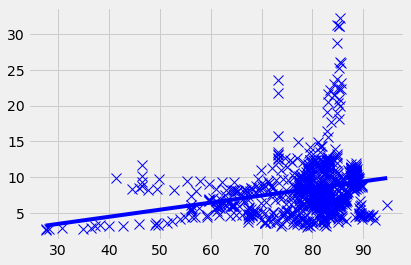

In [0]:
## REGRESSION
fit = np.poly1d(np.polyfit(df4_eu_tc['PC'], df4_eu_tc['eu_tonne_per_capita'], 1))

PC_mesh = np.linspace(min(df4_eu_tc['PC']), max(df4_eu_tc['PC']), 100)

plt.plot(df4_eu_tc['PC'], df4_eu_tc['eu_tonne_per_capita'], 'bx', label='Data', ms=10)
plt.plot(PC_mesh, fit(PC_mesh), '-b', label='Linear fit')
print(fit)

In [0]:
X = df4_eu_tc['PC'].values.reshape(-1,1)
y = df4_eu_tc['eu_tonne_per_capita'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)

## plot 4 --


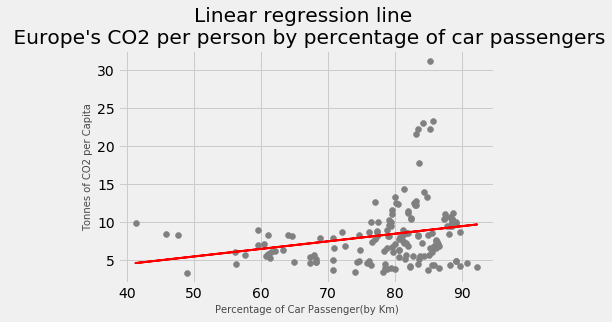

In [0]:
ax = plt.scatter(X_test, y_test,  color='gray')
ax1 = plt.plot(X_test, y_pred, color='red', linewidth=2)


plt.yticks([ 5, 10, 15, 20, 25, 30])
plt.title("Linear regression line \n Europe's CO2 per person by percentage of car passengers")

plt.xlabel('Percentage of Car Passenger(by Km)', fontsize= 10, alpha = 0.7)

plt.ylabel('Tonnes of CO2 per Capita', fontsize= 10  ,alpha = 0.7)


plt.show()

## Animation

In [0]:
from matplotlib import rc
from matplotlib import animation
from IPython.display import HTML, Image
rc('animation', html='jshtml')
! apt install imagemagick
! convert --version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fo

In [0]:
!apt install ffmpeg

!apt-get update imagemagick --fix-missing

!convert --version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
E: The update command takes no arguments
Version: ImageMagick 6.9.7-4 Q16 x86_64 20170114 http://www.imagemagick.org
Copyright: © 1999-2017 ImageMagick Studio LLC
License: http://www.imagemagick.org/script/license.php
Features: Cipher DPC Modules OpenMP 
Delegates (built-in): bzlib djvu fftw fontconfig freetype jbig jng jpeg lcms lqr ltdl lzma openexr pangocairo png tiff wmf x xml zlib


In [0]:
import seaborn as sns
%matplotlib notebook
!pip install pillow

In [0]:
# Create figure and axes
fig, ax = plt.subplots(figsize = (18,9))

# Animation function
ann_list = []
def animate(i):
  plt.style.use('fivethirtyeight')
  at_year = df4_eu_tc[df4_eu_tc['TIME'] == i]
  

  # Clear axes
  ax.cla()
  # Apply settings to axes
  ax.set_title(i)
  ax.axhline(y=20, color='grey')
#   ax.axhline(y = 0 , color = 'green', linewidth = 1, alpha = 1)
#   ax.axvline(x = 400 , color = 'green', linewidth = 1, alpha = 1)
  plt.yticks([ 30, 40, 50, 60, 70, 80, 90,100])
  ax.set_yticklabels(labels = ['','30', '40', '50', '60', '70','80','90','100%'], alpha =0.7)
  plt.xticks(range(0,30,5))
  ax.set_xticklabels(labels = [ 0, '5', '10', '15', '20', '25','30'], alpha = 0.7);
  # create plot
  sns.scatterplot(x='eu_tonne_per_capita', y="PC", hue='GEO', size='population',
              data=at_year, ax=ax, sizes=(50,2000))
  # Create legend and main title text
  ax.set(xlabel='CO2 Emission per Capita (Tonnes)', ylabel='% of Passengers Using Cars as Transportaion')
  
#   lgd = ax.legend(loc=2,
#                   bbox_to_anchor=(1.5,0.1),borderaxespad=0.)
  #ax.text(x = -2, y = 104, s = 'Turkey, towards a greater carbon imprint', fontsize = 14, color= 'grey', alpha = 0.8,fontweight ='bold' )
  ax.text(x = -2, y = 105, s = "Europe's car dependecy by CO2 emission per capita", fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
  ax.text(x = -2, y = 102, s = 'More cars but less CO2 emission per person', fontsize = 14, color= 'grey', alpha = 0.8,fontweight ='bold' )
  ax.text(x = -2.8, y = 109, s = " ©LAMBDASCHOOL PROJECT - FIG 5 - Mohamad Ali Nasser                                                               Data Sources: EUROSTAT - EU National Statistical Institutes - UNFCCC", fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
  ax.legend(labels = ['_nolegend_','Population size'],bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.)
  
#  ax.text(df4_eu_tc_turkey['eu_tonne_per_capita'], df4_eu_tc_turkey['PC'], 'Turkey', horizontalalignment='center', size='medium', color='black', weight='light')
  fig.savefig('samplefigure')
 
  
#   for i, a in enumerate(ann_list):
#     a.remove()
#   ann_list[:] = []
#   for line in range(0,df4_eu_tc_turkey.shape[0]):
#     ann = ax.text(df4_eu_tc_turkey['eu_tonne_per_capita'][line], df4_eu_tc_turkey['PC'][line], 'Turkey', horizontalalignment='center', size='medium', color='black', weight='light', transform=ax.transAxes)
  
#     ann_list.append(ann)
  # Countries:
  
#   plt.ylabel('Percentage of Passenger(by Km) Taking Cars', alpha = 0.7)
#   ax.text(x = -2, y = 120, s = 'CO2 Emission: Trukey, Switzerland and Europe', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
#   ax.text(x = -2, y = 115, s = 'Turkey, towards a greater carbon imprint', fontsize = 14, color= 'grey', alpha = 0.8,fontweight ='bold' )
#   ax.text(x = -4, y = 8, s = " ©LAMBDASCHOOL PROJECT - FIG 4 - Mohamad Ali Nasser                              Data Sources: EU National Statistical Institutes - UNFCCC", fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
  ax.set_xlim(0, 32)
  ax.set_ylim(20, 100)
plt.close()

<IPython.core.display.Javascript object>

In [0]:
anim = animation.FuncAnimation(fig, animate, frames=range(1990, 2016, 1),
                               repeat=True)

## animwNew Section

In [0]:
anim

In [0]:
anim.save('./animation.gif', writer='imagemagick', fps=2)
from google.colab import files
files.download('animation.gif') 

## Testing


In [0]:
df = df.loc[df['country'] == country] # Select the country
df = df.T # Transpose the data
df.columns = df.iloc[2] # Reindex the columns' header
df = df.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
df['public_transport'] = name['TRN'] + name['BUS_TOT']
ax2 = name['public_transport'].plot( color = 'purple')
ax3 = public_transport['total_mean'].plot(color = 'black', rot = 90, alpha = 0.8)
ax3.legend(labels = ['Public Transportation (Bus + Train)', 'EU Mean Public Transportation','Train','Bus','Cars'],bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.) # Label the legends, a

plt.show()

In [0]:
dfT.columns = dfT.iloc[2] # Reindex the columns' header
dfT = dfT.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
dfT['public_transport'] = dfT['TRN'] + dfT['BUS_TOT'] # Create a column consisting of both train and bus

In [0]:
slopes = df[cols].T.iloc[:, :].diff().div(df[col].diff(), axis=0)

In [0]:
df.loc[df['country'] == country]

## Loading more data

In [0]:
from google.colab import files
uploaded = files.upload()

Saving ttr00015.tsv to ttr00015 (1).tsv


In [0]:
df2 = pd.read_csv('ttr00001.tsv', sep = '\t|\,', engine ='python')
df2.rename(columns={'geo\\time':'country'}, inplace=True) # "geo\time" header appears to be 'geo\\time' as shown when we run `` list(df2.columns) ``

cols = list(df2.columns[2:]) # Get select the numerical columns only
df2 = df2.astype('str') # Convert df2 from object to string

for col in cols: # Iterate through every column strip the letters from the numbers, reconvert the 'nan' to NaN, convert ": z" to 0.
  df2[col] = df2[col].str.strip(" e b be r d p")
  df2[col] = df2[col].replace('nan', np.nan)
  df2[col] = df2[col].replace(': z', 0)
df2['country'] = df2['country'].replace('EL', 'GR')
df2['country'] = df2['country'].replace('UK', 'GB')
df2[cols] = df2[cols].astype('float') # Convert string to float

In [0]:
df2.head()

,unit,tra_cov,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,MIO_PKM,TOTAL,AT,8262,8514,9687,9620,9713,10172,10606,11188,11345,11433,12021,12077
1,MIO_PKM,TOTAL,BE,8964,9403,10139,10237,10498,10498,:,: c,: c,: c,: c,: c
2,MIO_PKM,TOTAL,BG,2411,2404,2317,2138,2090,2059,1870,1821,1698,1549,1455,1434
3,MIO_PKM,TOTAL,CH,:,:,16456,17223,17800,18320,18115,18277,18801,19119,19602,19616
4,MIO_PKM,TOTAL,CY,: z,: z,: z,: z,: z,: z,: z,: z,: z,: z,: z,: z


In [0]:
df2 = df2.merge(countries, left_on='country', right_on='Code') # Merge dataframe country with coutnry codes
df2 = df2.drop(columns=['country', 'Code']).rename(columns={'Name':'country'}) # Drop irrelavnt columns
k = list(df2.columns[:-1]) # Create list of column names less the 'country' column name
k.insert(0, df2.columns[-1]) # Insert the 'country' column name at index 0 of the list
df2 = df2.reindex(columns = k) # Reindex the columns of the DataFrame based on the indexed list

In [0]:
turkey_gdp = df2.loc[df2['country'] == 'Turkey']

In [0]:
turkey_gdp

,country,unit,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
31,Turkey,I05,100.0,97.9,96.6,98.3,105.5,103.7,99.7,101.0,96.1,94.2,93.6,93.7


In [0]:
df2['Percentage_of_change'] = abs((df2['2016'] - df['2005'])/df['2005'])

In [0]:
def selectcountry2(df,country): # Create a function that create a bar and line pllot refelecting of the selected country
  
  name = df.loc[df['country'] == country] # Select the country
  name = name.T # Transpose the data(# Reindex the columns' header
  name = name.drop(['unit', 'country']) # Drop irrelevant rows
   # Create a column consisting of both train and bus
  
  plt.style.use('fivethirtyeight') # choose the 538 style
  ax = name.plot(figsize = (15,7)) # Plot

  
  # Titlem labels and text
  plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
  ax.text(x = -2, y = 80, s = 'Private vs Public Transportation in '+ country + '\nPercentage of Passengers (by Km) per Year (1996-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
  plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - Mohamad Ali Nasser                                                                                                                                                                 Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
  return plt.show()

In [0]:
def selectcountry3(df,country): # Create a function that create a bar and line pllot refelecting of the selected country
  
  name = df.loc[df['country'] == country] # Select the country
  name = name.T # Transpose the data
  name.rename(columns={31 :'gdp_ratio'}, inplace=True)
  name = name.drop(['unit', 'country']) # Drop irrelevan
  

  return name.head()

In [0]:
df2.dtypes

unit        object
country     object
2005        object
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
dtype: object

In [0]:
selectcountry3(df2, 'Turkey')

NameError: ignored

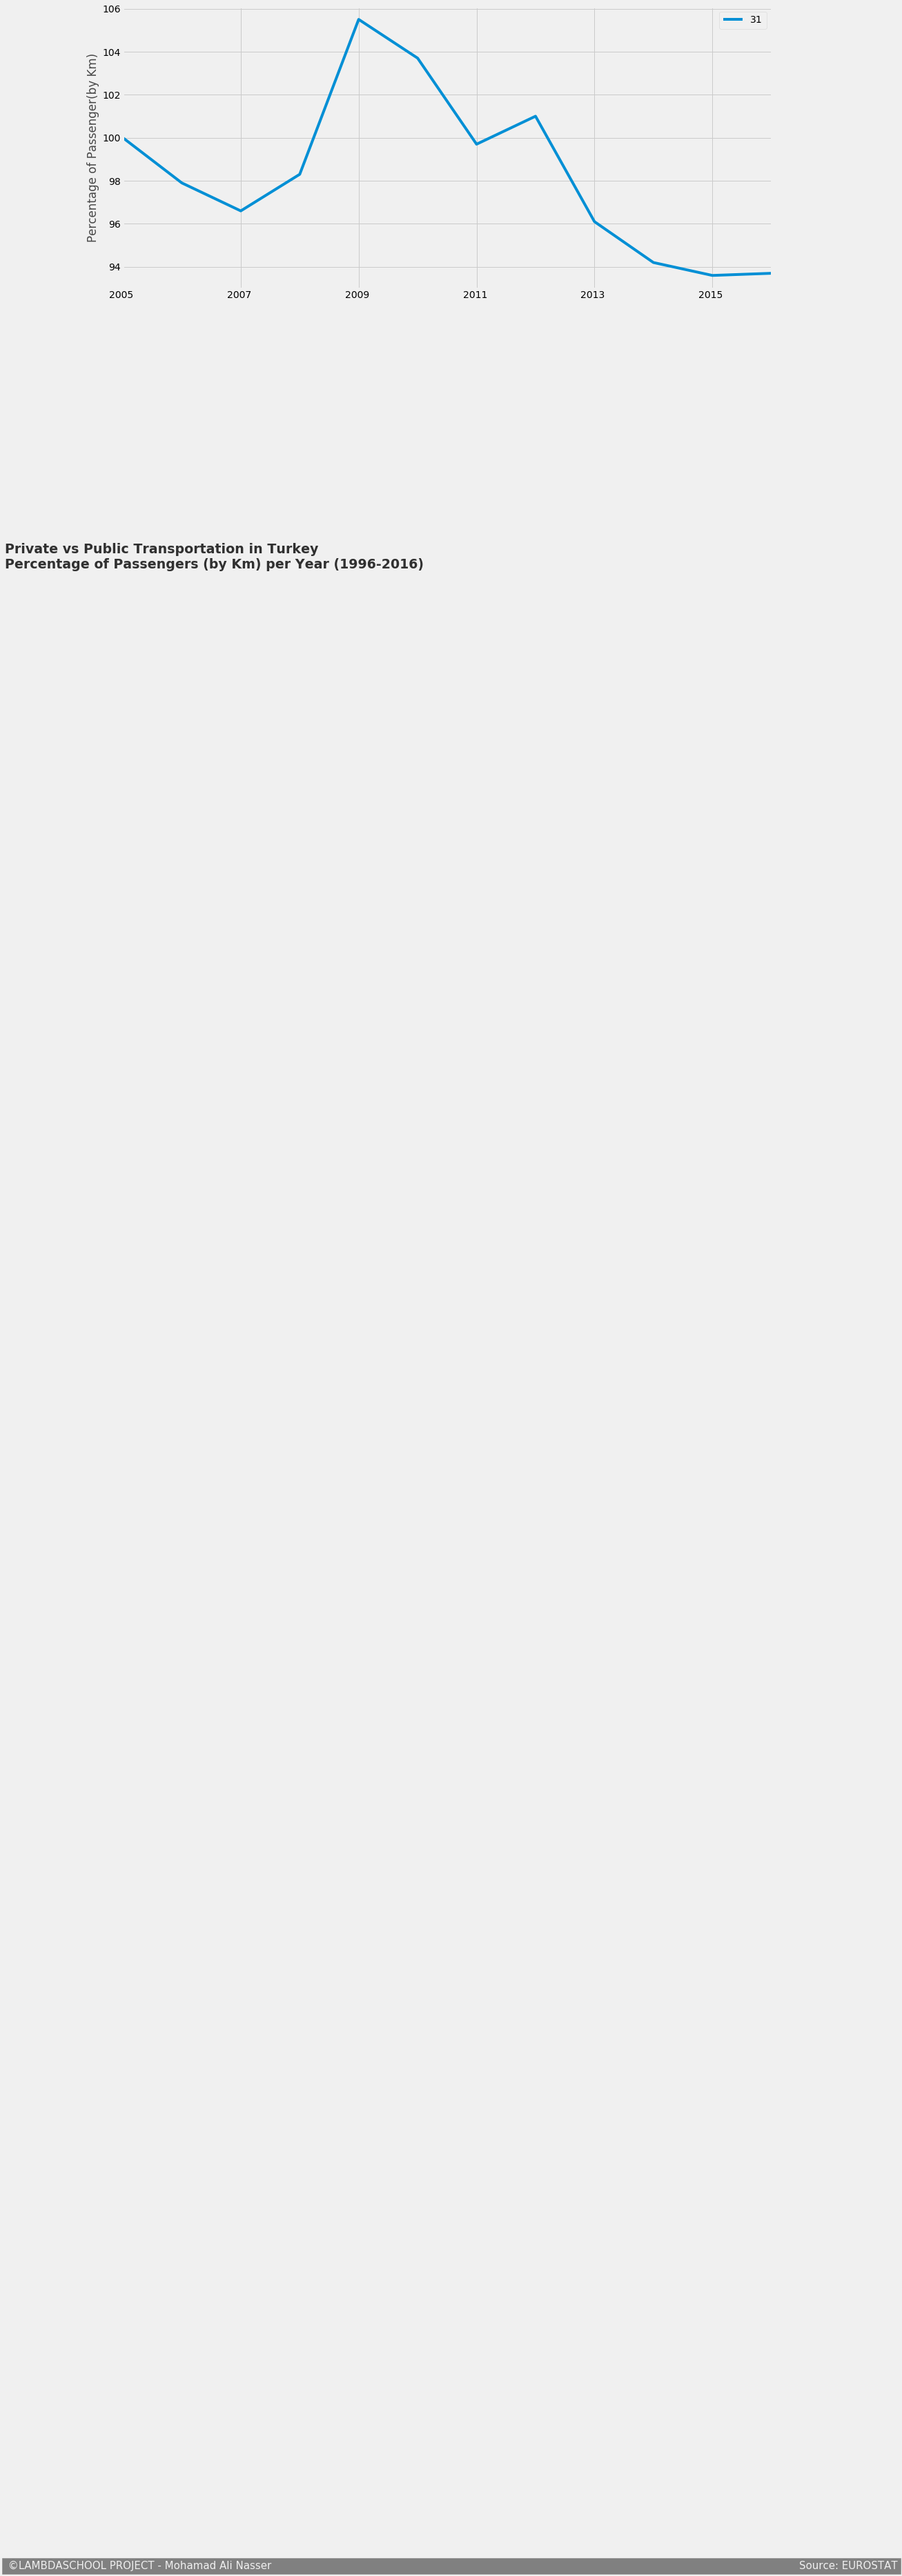

In [0]:
selectcountry2(df2, 'Turkey')

In [0]:

  plt.style.use('fivethirtyeight') # choose the 538 style
  ax = name.plot(figsize = (15,7)) # Plot

  
  # Titlem labels and text
  plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
  ax.text(x = -2, y = 80, s = 'Private vs Public Transportation in '+ country + '\nPercentage of Passengers (by Km) per Year (1996-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
  plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - Mohamad Ali Nasser                                                                                                                                                                 Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
  return plt.show()
  # Set x and y ticks
  plt.yticks([0, 10, 20, 30, 40, 50, 60, 70])
  ax.set_yticklabels(labels = ['0','10 ', '20', '30', '40','50','60','70%'], alpha =0.7)
  ax.set_xticklabels(labels = cols, alpha = 0.7)

In [0]:
selectcountry2(df2,'Turkey')

TypeError: ignored